### Author : Sanjoy Biswas
### Topic : Mall Customer Segmentation & Analysis
### Email : sanjoy.eee32@gmail.com

# **Data Import  And Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


As you can see we have five columns: Customer ID , Gender, Annual Income and Spending score.

In [4]:
len(df)

200

And there are 200 columns. So this is quite a small dataset with less number of rows and columns. Now lets begin working with all the data that we have

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

But first we need to check if there are any missing values or not. Turns out our dataset is clean without any null values. So we dont have to worry about filling any missing columns or rows

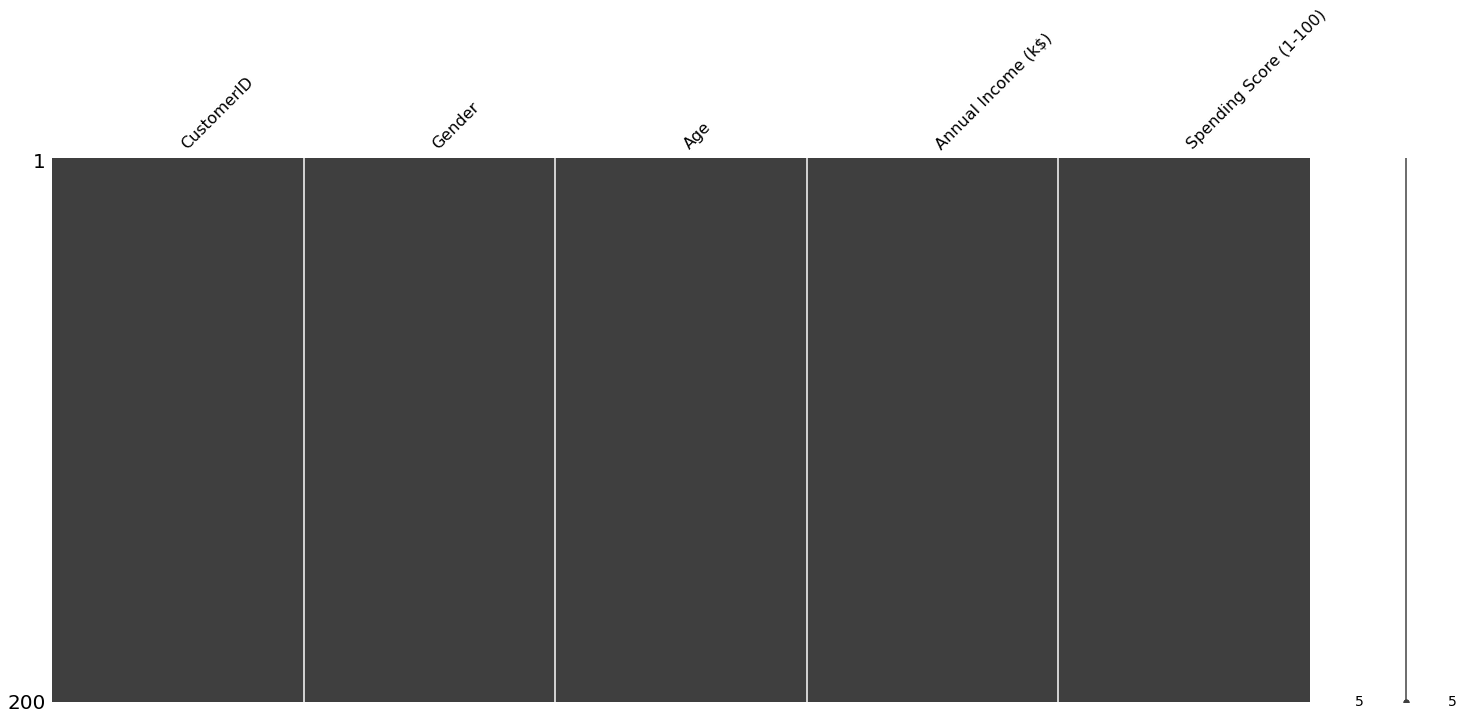

In [6]:
import missingno as msno
msno.matrix(df)

You can see that our graph shows continuous dark lines without any horizozntal interruptions. This support our previous idea that we dont have any missing values

Now lets check the Gender Column. There might be two possiblities: either gender is just classified as male and female or there are other classifications that identify LGBTQ community. 

In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

So we only have two genders listed.
Now lets do some short codings so that we dont have any duplicate values.

In [8]:
print(sum(df.duplicated()))
df = df.drop_duplicates()


0


Now lets look onto the distribution of age and income of our customers

**DATA WRANGLING AND VISUALIZATION**

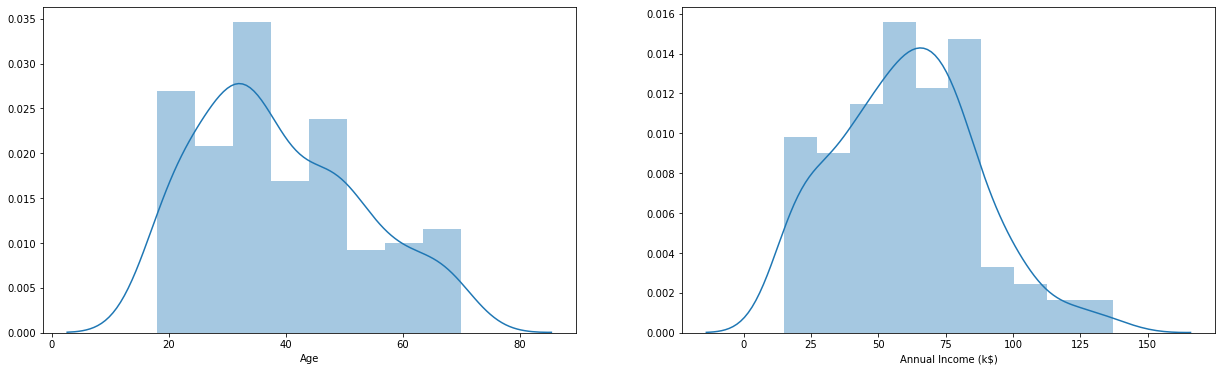

In [9]:
ig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['Age'], ax=axes[0])
sns.distplot(df['Annual Income (k$)'], ax=axes[1])



The first figure shows us that the average age of our customers is around 35. The age of our customers is typically between 20 and 70.

Now talking about annual income, majority of our customers have an annual income around 80K per annum. The salary ranges from 15k to 135k

Lets see which gender makes up the majority of people visiting our store

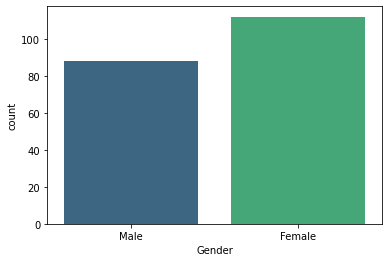

In [10]:
sns.countplot(x='Gender', data=df, palette='viridis')

Out of 200 people, around 115 were women while 85 were men. The barchart above clearly illustrates the fact that we have more female
customers than male. Perhaps, we have more of household products or may be our stores have more emphasis on items on which female 
population is interested

Now lets look onto the spending scores of male and female individually

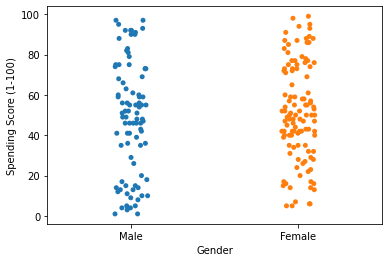

In [11]:
sns.stripplot(x='Gender', y = 'Spending Score (1-100)', data = df)

Roughly, male and female both have similar spending score. We can see more number of dots on the female side because of 
large number of female population compared to male population. We can see both the male and female population have two gaps in their distribution : around 20 and 60. These two gaps divide the population into three chunks: people with score below 20, people with score between 30 and 60 , and people with speding score between 60 and 80. So we conclude that there are three types of customers in both the gender on the basis of their spending habit. We are most interested in the top most group.  

Now lets see if there is any differences in the income of the population in two genders that might explain their spending habit

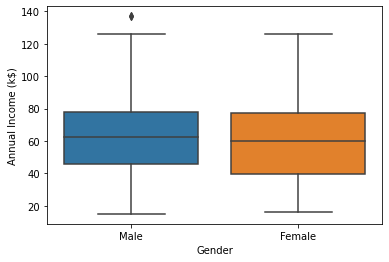

In [12]:
sns.boxplot( x= 'Gender', y = 'Annual Income (k$)', data = df )

There are few outliers in the male population on the top. Surprisingly, the females have a little less average income but still our store has more female customers which clearly indicates that females visit our stores regardless of their income. Perhaps, men are more interested in saving than spending. 

Now lets look at some complex plot

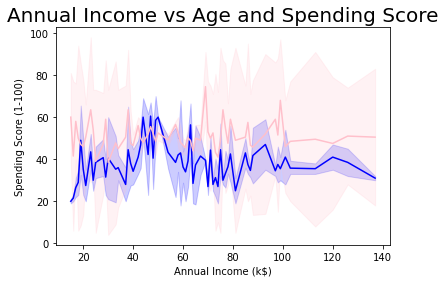

In [13]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()


We can see that people with the highest spending score are the ones with annual income of 50k. Perhaps our store is a retail store with only few luxury brands and more of household and daily products. Despite large income, some people appear to have decreasing spending score which is clear onthe right edge of the graph.

In [14]:
df['Gender'].replace({'Male': 0, 'Female': 1},inplace = True) 

Here we have replaced males with 1 and females with 0. Quantifying the variables will enable us to execute machine learning methods for future predictions. Now lets check if we have succesfully dummied these values or not.


In [15]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [16]:
df.drop('CustomerID', axis=1, inplace = True)

Since the customer ID are nothing more than unique numbers assigned to each customers, we have removed this column. Lets check

In [17]:
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


Now lets try to find if there is any correlation between any of our data.

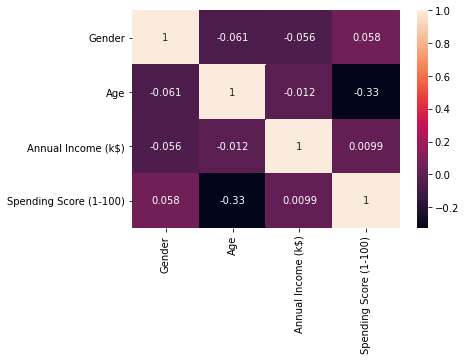

In [18]:
sns.heatmap(df.corr(), annot=True)

The figure above indicates that none of the columns we have are strongly correlated to each other. So using machine learning technique of linear regression wont give us an accurate predictive outcome

In [19]:
def impute_age(cols):
    spend=cols
    if spend > 55:
         return 1
    else:
         return 0
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].apply(impute_age)
df.head(5)
    

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,0
1,0,21,15,1
2,1,20,16,0
3,1,23,16,1
4,1,31,17,0


Now, lets make a fair assumption that people with spending score of more than 55( the topmost chunk in the aforementioned plot)
are our target customers as they are highly likely to make purchases. Once we can accurately predict these group of customers by looking at their age, gender and income , we cann apply several tactics like sending emails of new offers to increase the number of purchases

**Machine Learning: Logistic Regression**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df.drop('Spending Score (1-100)',axis=1), df['Spending Score (1-100)'], test_size=0.30, random_state=101)
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)
pred=log.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.65      0.83      0.73        36
           1       0.57      0.33      0.42        24

    accuracy                           0.63        60
   macro avg       0.61      0.58      0.58        60
weighted avg       0.62      0.63      0.61        60



As we can see the logistic regresion only has a probability of predicting the target customer with a probability of 0.6, which is pretty low, we will apply another machine learning technique( K Nearest Neighbor) to our data.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Spending Score (1-100)',axis=1))
scaled_features = scaler.transform(df.drop('Spending Score (1-100)',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


,Gender,Age,Annual Income (k$)
0,-1.128152,-1.424569,-1.738999
1,-1.128152,-1.281035,-1.738999
2,0.886405,-1.352802,-1.700830
3,0.886405,-1.137502,-1.700830
4,0.886405,-0.563369,-1.662660


Here we have standardized out data for further processing.

**Machine Learning: K-Means Clustering**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Spending Score (1-100)'],
                                                    test_size=0.30)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[22 13]
 [10 15]]
              precision    recall  f1-score   support

           0       0.69      0.63      0.66        35
           1       0.54      0.60      0.57        25

    accuracy                           0.62        60
   macro avg       0.61      0.61      0.61        60
weighted avg       0.62      0.62      0.62        60



With interval value=1, we see that our predicitve probability is just 0.68. Lets check which interval value between 1 and 40 gives us the most accurate result.

Text(0, 0.5, 'Error Rate')

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

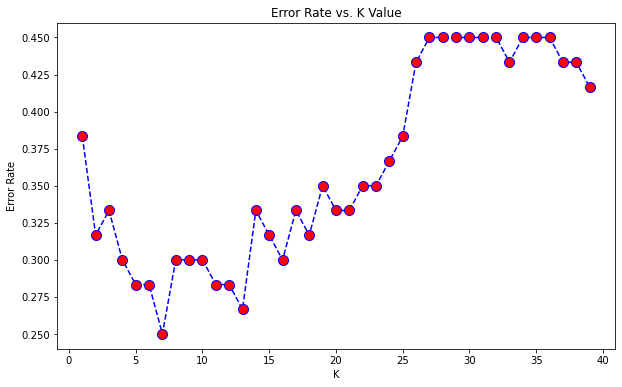

In [23]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We can see from the figure above that at the K interval value of 3, the error rate is low.So now,lets find the classification report with error rate =3.

In [24]:

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[26  9]
 [11 14]]


              precision    recall  f1-score   support

           0       0.70      0.74      0.72        35
           1       0.61      0.56      0.58        25

    accuracy                           0.67        60
   macro avg       0.66      0.65      0.65        60
weighted avg       0.66      0.67      0.66        60



So with the K-Nearest Neighbour algorithm, we can predict if a customer is our target customer or not with a probability of roughly 8/10, which is pretty much acceptable. Hope you found this analysis helpful. Feel free to ask if you have any questions with the code above. There are other algorithms that you can apply to find if they are more accurate.

**THANK YOU**